# Homework 2

## Part 1: Support Vector Machines Demo

### Simply Explained: Support Vector Machine
Support Vector Machine (after this I will say SVM) is a machine learning approach that has a classifier and regressor, in this section I will cover classifier.

There are versions of SVM such as Linear SVM. In linear SVM, model fits **N** lines to split classes from each other (N is class count - 1 ). We will say **Decision Lines** to these lines. 

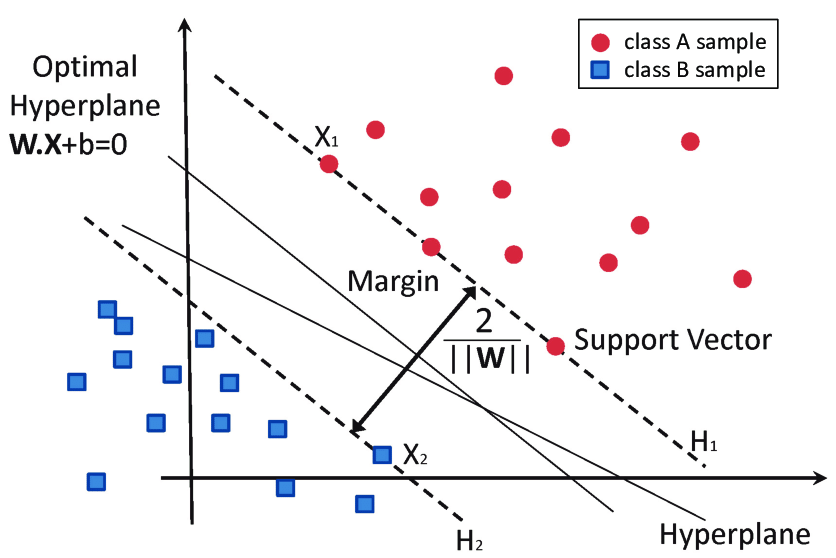

And in order to make classifier durable, **decision line** must be in the closest position to **support points** of each class.

I know, I have not explain what is support point. Support point (also support vectors) is the points that nearest to the decision line. You can see them in the graph above.

And sometimes our dataset may be non-linear. However we can still use SVM to classify non-linear dataset. In order to do this we'll use **kernel tricks**. If we add a new dimension to data we may classify it using lines. Let's take a look at the images below. In this example we've added a new dimension (Z) to data and now we can classify it using a line.


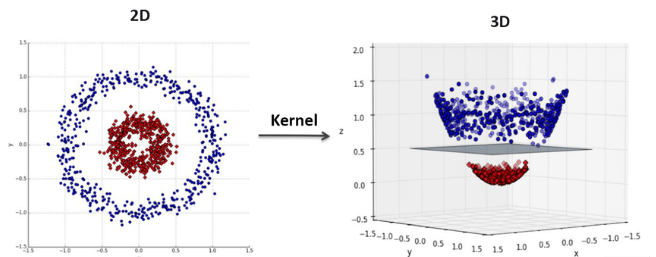


Everything you need to know about basics of Support Vector Machine was this. Let's start to implement! First, we will implement Support Vector Machines (SVM) on several 2D data set to have an intuition of the algorithms and how it works. Next, we will use SVM on emails datasets to try and classify spam emails. 

**You are going to be asked to 1) finish the codes in a few cells; 2) provide answers to a few questions. Look closely so that you don't miss any questions.**

**Before you start, you may need to use pip to install these packages: numpy, pandas, matplotlib, scipy, sklearn, etc.**

### Loading of the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
mat = loadmat("ex6data1.mat")
X = mat["X"]
y = mat["y"]

### Plotting the data

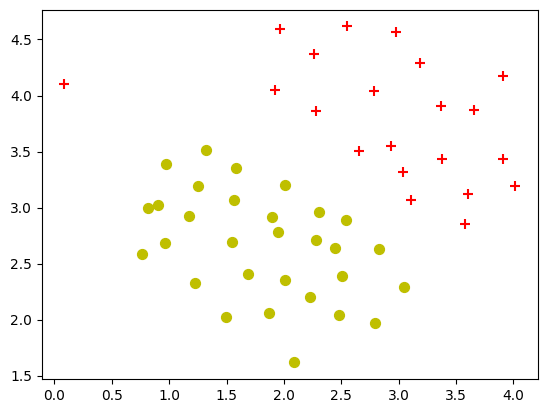

In [4]:
m,n = X.shape[0],X.shape[1]
pos,neg= (y==1).reshape(m,1), (y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

### Using support vector machines

In [5]:
from sklearn.svm import SVC
classifier = SVC(C= 1, kernel="linear")
classifier.fit(X,np.ravel(y))

SVC(C=1, kernel='linear')

### Visualising the Training set results

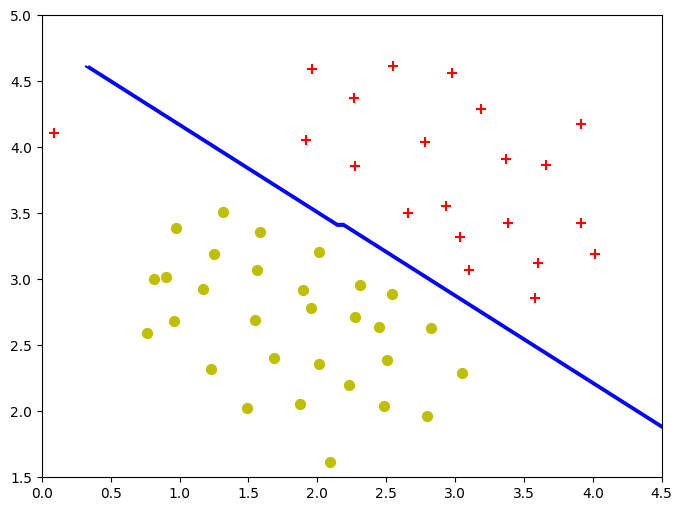

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)


_ = plt.ylim(1.5, 5)  # 将返回值赋值给 _，避免打印到控制台

Here the meshgrid function creates a meshgrid inside the canvas, X_1 X_2 stored the X and Y coordinates in 2-D array, respectively. 
Carefully read https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html to understand how a contour was created.

#### Question: what does the contour represent? Or in other words, what is the blue line?

**Answer:**  
The blue contour line represents the decision boundary of the Support Vector Machine (SVM) classifier that separates the different classes.


### Soft margin SVM classifier, regularization

In [7]:
# Test C = 100
classifier2 = SVC(C=100,kernel="linear")
classifier2.fit(X,np.ravel(y))

SVC(C=100, kernel='linear')

#### Question: Read the https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html, answer the following questions

- What does the C value mean? By increasing C value, what will be the impact? 
- What is the kernal function being used here? Why is it chosen over the default "rbf" kernal? 

**Answer:**
1) In Support Vector Machines (SVM), the C value is a regularization parameter that controls the trade-off between achieving a low error on the training data and ensuring that the decision function has a large margin. Specifically:  
   
- C value meaning:  

    The parameter C determines the penalty for misclassifying samples. A smaller C means a stronger regularization, which allows for a larger margin but may tolerate more classification errors. Conversely, a larger C means a weaker regularization, which aims to correctly classify all training samples, potentially at the cost of a smaller margin.  

     Mathematically, the optimization problem in SVM involves minimizing an objective function that is a combination of the margin and the sum of the slack variables (which account for misclassifications). The C parameter scales the influence of the slack variables in this objective function.  

- Impact of increasing C value:  

    When C is increased, the penalty for misclassifying samples becomes higher. This means the model will try harder to correctly classify all training samples, potentially leading to a more complex decision boundary that fits the training data very closely.  

    However, increasing C can lead to overfitting, where the model performs well on the training data but may generalize poorly to new, unseen data. This is because a very high C value can cause the model to become too sensitive to noise and outliers in the training set.


2) In the code, the kernel function being used is the linear kernel (kernel="linear").
   
Why is the linear kernel chosen over the default "rbf" kernel?:
- The choice of kernel function depends on the nature of the data and the problem at hand. The linear kernel is appropriate when the data is linearly separable or when the relationship between the features and the target class is believed to be linear. 

 - The Radial Basis Function (RBF) kernel (the default in sklearn.svm.SVC) is a non-linear kernel that can handle more complex decision boundaries by mapping the data into a higher-dimensional space. However, if the data is already linearly separable, using the RBF kernel may introduce unnecessary complexity and computational overhead.    

- In scenarios where the data is expected to have a linear decision boundary like in this question, the linear kernel is preferred for its simplicity and efficiency. It avoids the additional hyperparameters (like gamma in the RBF kernel) that need to be tuned, making the model simpler to train and interpret.

(1.5, 5.0)

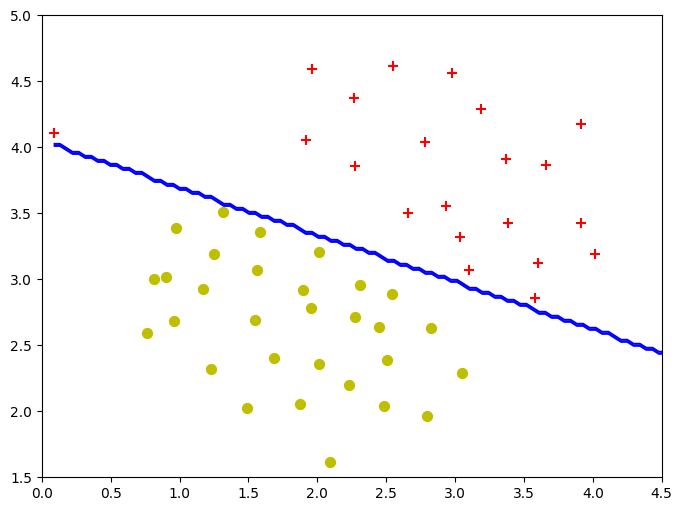

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_3,X_4 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
Z = classifier2.predict(np.array([X_3.ravel(), X_4.ravel()]).T)
Z = Z.reshape(X_3.shape)
plt.contour(X_3, X_4, Z, 1, colors = "b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

#### Question: Is the performance of the second classifier better or worse than the first one? Why?

The second classifier's performance on the training set might be better, but it could be worse in real-world applications. Here's why:
1. Impact of Parameter C:  In SVM, the C parameter is a regularization parameter that controls the trade-off between achieving a low error on the training data and ensuring a large margin. A smaller C allows for a larger margin but may tolerate more misclassifications, while a larger C aims to correctly classify all training samples, potentially leading to a smaller margin.
2. First Classifier (C=1):  With a smaller C value, the model allows for a larger margin and may tolerate some misclassifications. This can result in better generalization to new, unseen data as it is less likely to overfit the training data.
3. Second Classifier (C=100):  A larger C value forces the model to try harder to correctly classify all training samples, which can lead to a more complex decision boundary that fits the training data very closely. As can be seen from the secend graph, the decision boundaries are closer to the data points, which may mean that the model performs better on the training set. However, this might cause overfitting, where the model performs well on the training data but poorly on new data.  

In summary, while the second classifier might seem better on the training set, the first classifier is likely to generalize better to new data.

### SVM with gaussian kernels

Let's try a different dataset.

In [9]:
mat2 = loadmat("ex6data2.mat")
X2 = mat2["X"]
y2 = mat2["y"]

### Plotting of data

(0.4, 1.0)

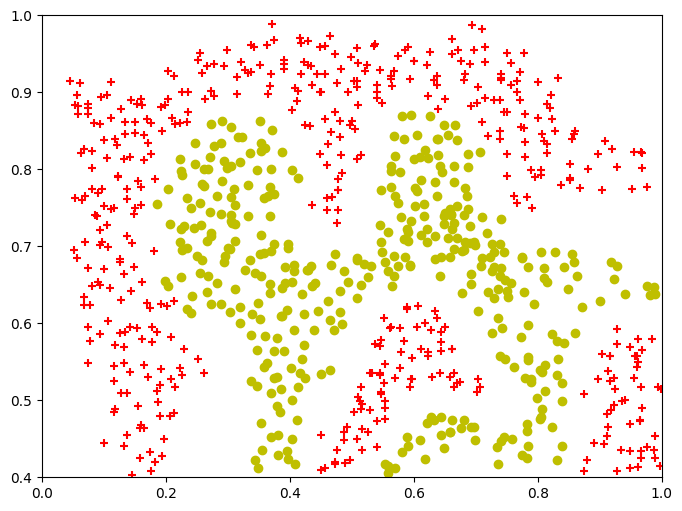

In [10]:
m2,n2 = X2.shape[0],X2.shape[1]
pos2,neg2= (y2==1).reshape(m2,1), (y2==0).reshape(m2,1)
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
plt.xlim(0,1)
plt.ylim(0.4,1)

#### Question: Would the linear classifier work on this dataset? Why or why not? You are welcome to try it out by yourself.

The linear classifier would not work well on this dataset.
- Data Distribution: From the scatter plot, it's evident that the data points are not linearly separable. The yellow circles (one class) are surrounded by red plus signs (another class) in a non-linear pattern. There's no straight line that can cleanly separate the two classes without misclassifying many points.
- Linear Classifier Limitation: A linear classifier can only learn a linear decision boundary (a straight line in 2D space). Given the complex, non-linear distribution of the data in this dataset, a linear decision boundary would not be able to accurately distinguish between the two classes.
- Need for Non-linear Models: For this kind of dataset, non-linear models like SVM with non-linear kernels (e.g., RBF kernel), decision trees, or neural networks would be more appropriate as they can learn more complex decision boundaries that better fit the data distribution.  

If one tried a linear classifier on this dataset, it would likely result in poor classification performance with many misclassifications.

In [11]:
# use rbf kernel to classify the dataset above, set gamma to 20

classifier3 = SVC(gamma=20, kernel = "rbf")
classifier3.fit(X2, np.ravel(y2))


SVC(gamma=20)

### Visualising the decision boundary

(0.4, 1.0)

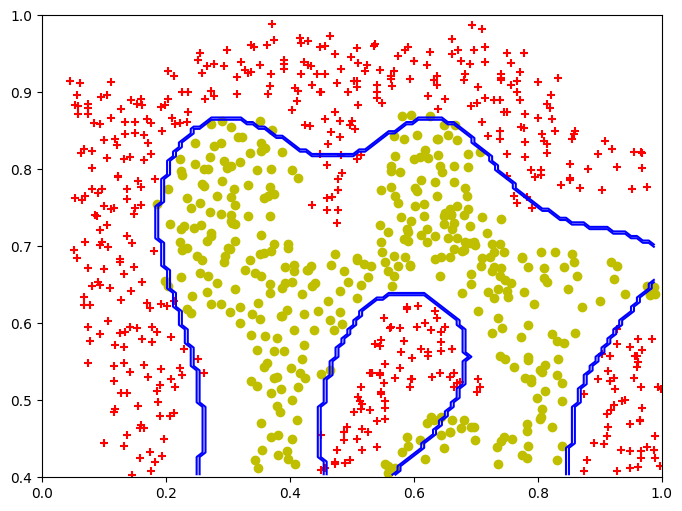

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")


# plotting the decision boundary
X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape),1,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)

**In the cells below, design a few more SVM with Gaussian kernels. This time try to play with different sets of gamma and C. Visualize each decision boundary and comment on which combination of gamma and C gives you the best performance.**

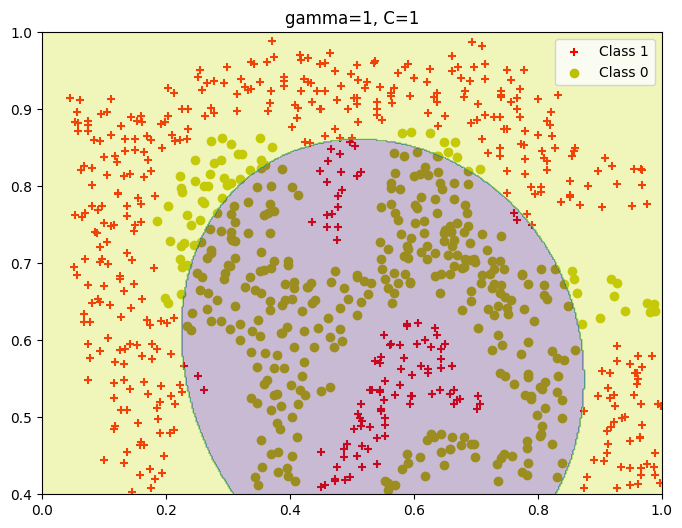

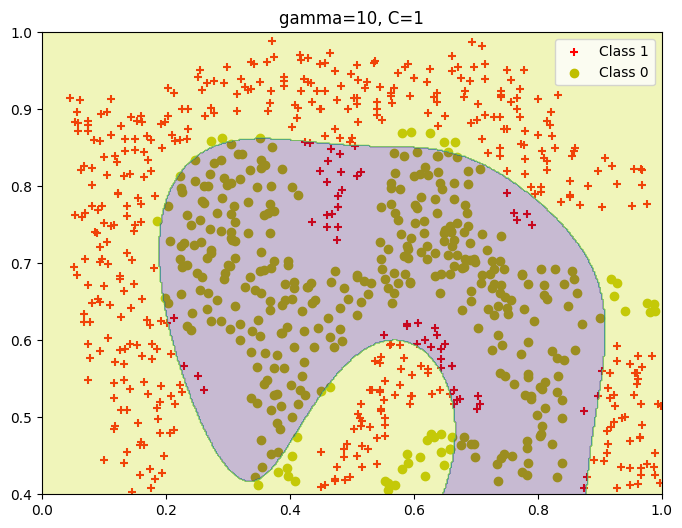

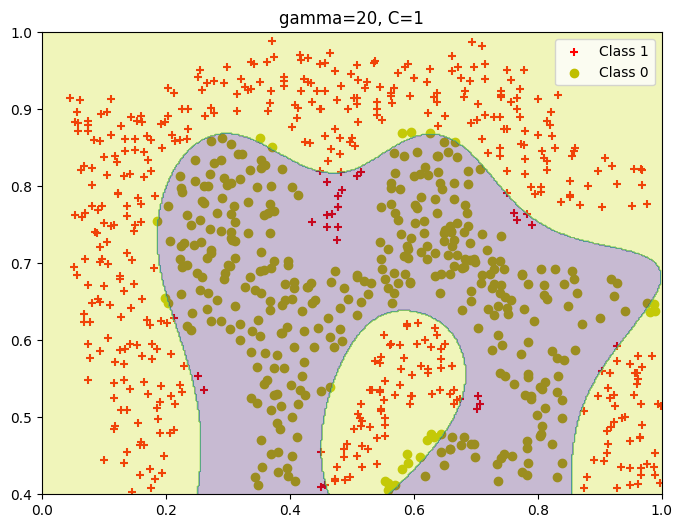

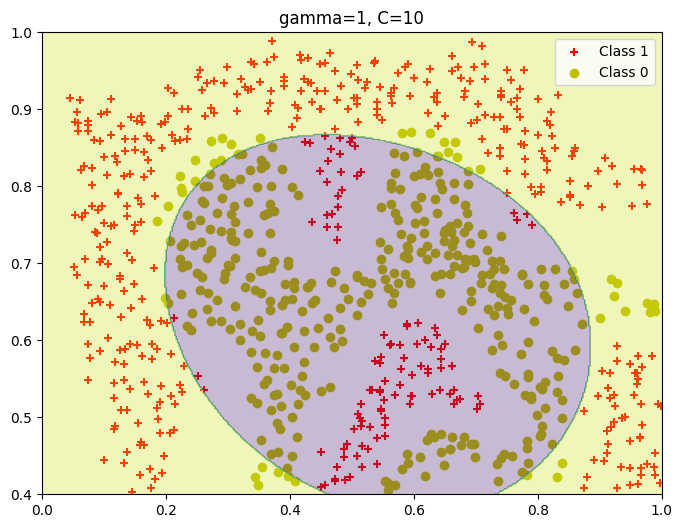

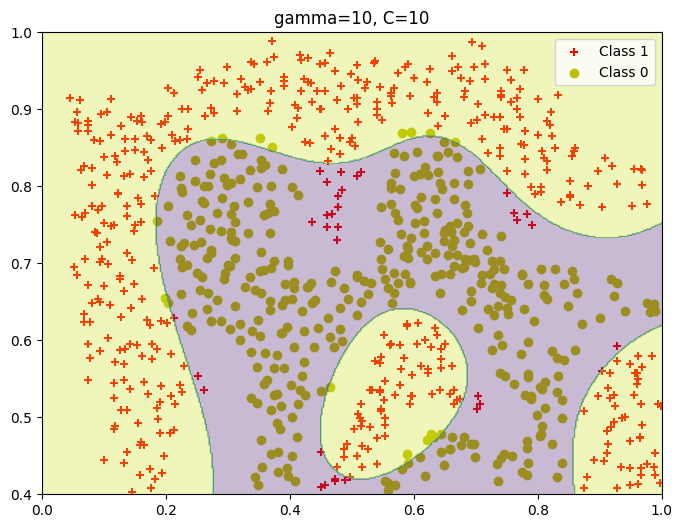

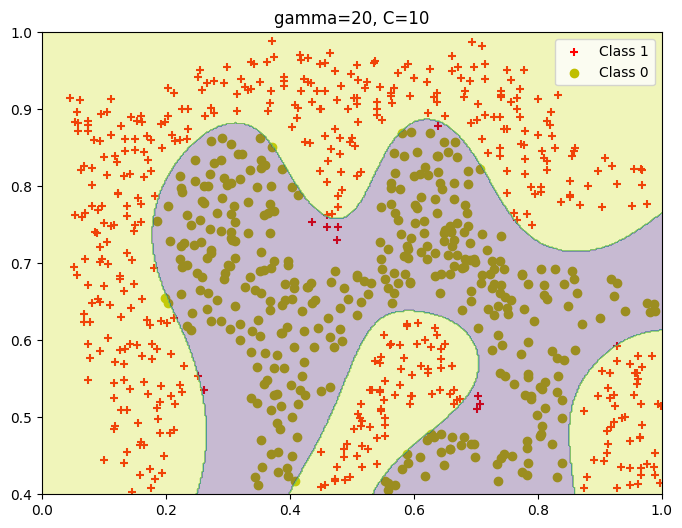

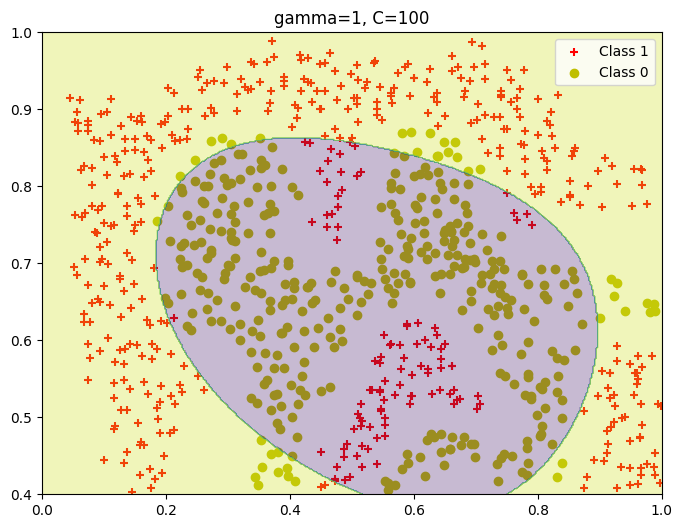

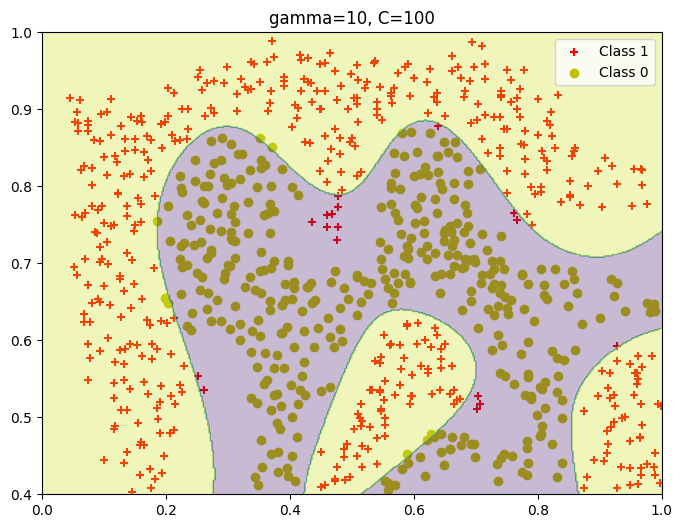

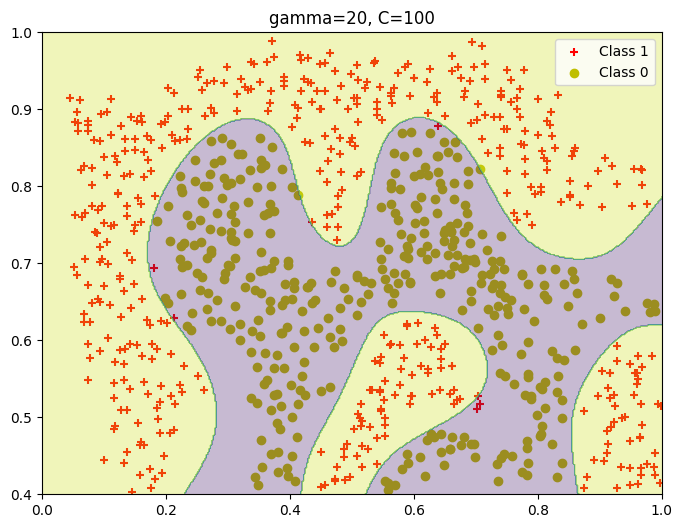

In [13]:
## 不区分训练集和测试集，代码结构类似上文代码

# 定义不同的gamma和C值组合
parameter_combinations = [
    {'gamma': 1, 'C': 1},
    {'gamma': 10, 'C': 1},
    {'gamma': 20, 'C': 1},
    {'gamma': 1, 'C': 10},
    {'gamma': 10, 'C': 10},
    {'gamma': 20, 'C': 10},
    {'gamma': 1, 'C': 100},
    {'gamma': 10, 'C': 100},
    {'gamma': 20, 'C': 100}
]

# 遍历每个参数组合
for i, params in enumerate(parameter_combinations):
    # 创建SVM分类器
    classifier = SVC(kernel='rbf', gamma=params['gamma'], C=params['C'])
    
    # 训练模型
    classifier.fit(X2, np.ravel(y2))
    
    # 可视化决策边界
    plt.figure(figsize=(8, 6))
    
    # 绘制数据点
    pos2 = (y2 == 1).flatten()  # 确保pos2是一维布尔数组
    neg2 = (y2 == 0).flatten()  # 确保neg2是一维布尔数组
    plt.scatter(X2[pos2, 0], X2[pos2, 1], c='r', marker='+', label='Class 1')
    plt.scatter(X2[neg2, 0], X2[neg2, 1], c='y', marker='o', label='Class 0')
    
    # 创建网格以绘制决策边界
    x_min, x_max = X2[:, 0].min() - 0.1, X2[:, 0].max() + 0.1
    y_min, y_max = X2[:, 1].min() - 0.1, X2[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    
    # 预测网格点的类别
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界
    contour = plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.xlim(0, 1)
    plt.ylim(0.4, 1)
    plt.title(f'gamma={params["gamma"]}, C={params["C"]}')
    plt.legend()
    plt.show()

e:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

gamma=1, C=1 - Cross-Validation Accuracy: 0.793 (±0.026)
gamma=1, C=1 - Test Accuracy: 0.780

gamma=10, C=1 - Cross-Validation Accuracy: 0.851 (±0.042)
gamma=10, C=1 - Test Accuracy: 0.896

gamma=20, C=1 - Cross-Validation Accuracy: 0.935 (±0.013)
gamma=20, C=1 - Test Accuracy: 0.913

gamma=1, C=10 - Cross-Validation Accuracy: 0.814 (±0.025)
gamma=1, C=10 - Test Accuracy: 0.827

gamma=10, C=10 - Cross-Validation Accuracy: 0.932 (±0.011)
gamma=10, C=10 - Test Accuracy: 0.925

gamma=20, C=10 - Cross-Validation Accuracy: 0.965 (±0.020)
gamma=20, C=10 - Test Accuracy: 0.977



e:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

gamma=1, C=100 - Cross-Validation Accuracy: 0.807 (±0.033)
gamma=1, C=100 - Test Accuracy: 0.821

gamma=10, C=100 - Cross-Validation Accuracy: 0.957 (±0.022)
gamma=10, C=100 - Test Accuracy: 0.960

gamma=20, C=100 - Cross-Validation Accuracy: 0.975 (±0.013)
gamma=20, C=100 - Test Accuracy: 0.994

Best parameters: {'C': 100, 'gamma': 20}
Best cross-validated accuracy: 0.9753623188405797


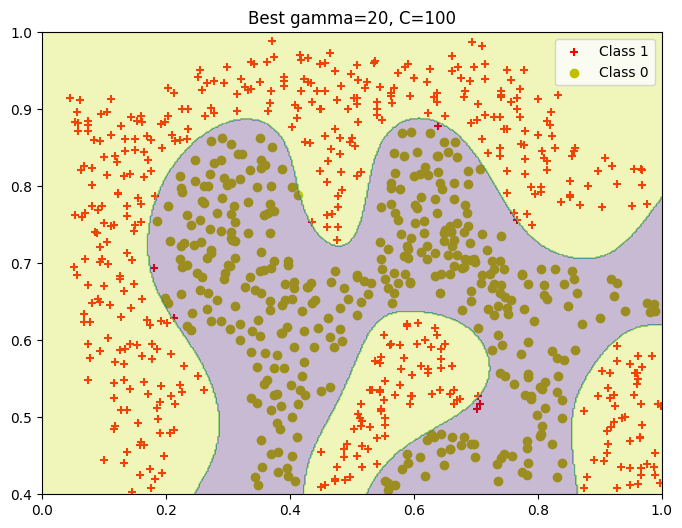

In [14]:
## 区分训练集和测试集，引入交叉验证、网格搜索和性能评估，增强可信度

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 加载数据
mat2 = loadmat("ex6data2.mat")
X2 = mat2["X"]
y2 = mat2["y"]

# 将数据集划分为训练集和测试集
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 定义参数网格
parameter_combinations = [
    {'gamma': 1, 'C': 1},
    {'gamma': 10, 'C': 1},
    {'gamma': 20, 'C': 1},
    {'gamma': 1, 'C': 10},
    {'gamma': 10, 'C': 10},
    {'gamma': 20, 'C': 10},
    {'gamma': 1, 'C': 100},
    {'gamma': 10, 'C': 100},
    {'gamma': 20, 'C': 100}
]

# 遍历每个参数组合
for i, params in enumerate(parameter_combinations):
    # 创建SVM分类器
    classifier = SVC(kernel='rbf', gamma=params['gamma'], C=params['C'])
    
    # 使用交叉验证评估模型
    scores = cross_val_score(classifier, X2_train, y2_train, cv=5, scoring='accuracy')
    print(f"gamma={params['gamma']}, C={params['C']} - Cross-Validation Accuracy: {np.mean(scores):.3f} (±{np.std(scores):.3f})")
    
    # 训练模型
    classifier.fit(X2_train, np.ravel(y2_train))
    
    # 在测试集上评估模型
    y_pred = classifier.predict(X2_test)
    test_accuracy = accuracy_score(y2_test, y_pred)
    print(f"gamma={params['gamma']}, C={params['C']} - Test Accuracy: {test_accuracy:.3f}\n")

# 使用网格搜索找到最佳参数
param_grid = {'gamma': [1, 10, 20], 'C': [1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X2_train, np.ravel(y2_train))

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# 使用最佳参数训练模型并绘制决策边界
best_classifier = grid_search.best_estimator_

plt.figure(figsize=(8, 6))

# 绘制数据点
pos2 = (y2 == 1).flatten()
neg2 = (y2 == 0).flatten()
plt.scatter(X2[pos2, 0], X2[pos2, 1], c='r', marker='+', label='Class 1')
plt.scatter(X2[neg2, 0], X2[neg2, 1], c='y', marker='o', label='Class 0')

# 创建网格以绘制决策边界
x_min, x_max = X2[:, 0].min() - 0.1, X2[:, 0].max() + 0.1
y_min, y_max = X2[:, 1].min() - 0.1, X2[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# 预测网格点的类别
Z = best_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
contour = plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.xlim(0, 1)
plt.ylim(0.4, 1)
plt.title(f'Best gamma={grid_search.best_params_["gamma"]}, C={grid_search.best_params_["C"]}')
plt.legend()
plt.show()

### Results Analysis

### Best Parameters and Performance

The best parameters found through grid search and cross-validation are:
- **gamma** : 20
- **C**: 100


These parameters achieved the highest cross-validated accuracy of **0.975**.

### Analysis of Parameter Impact

1. **Gamma Parameter**:
   - **gamma=1**: The decision boundary is too smooth and fails to capture the complex patterns in the data.
   - **gamma=10**: The decision boundary starts to capture some non-linear patterns but still lacks precision.
   - **gamma=20**: The decision boundary becomes more complex and accurately separates the classes, leading to the best performance.

2. **C Parameter**:
   - **C=1**: The model is too constrained, leading to a decision boundary that does not fit the data well.
   - **C=10**: The model fits the data better than C=1 but still allows some misclassifications.
   - **C=100**: The model fits the data very closely, minimizing misclassifications and achieving the highest accuracy.

### Conclusion

The combination of **gamma=20** and **C=100** provides the best balance between model complexity and generalization. This combination allows the SVM to capture the non-linear patterns in the data effectively while maintaining good performance on unseen data.

### Hyperparameter tunin

To find out the best combination of gamma and C, it is best to try hyperparameter tuning. To do so, let's first load a third matrix.

In [15]:
mat3 = loadmat("ex6data3.mat")
X3 = mat3["X"]
y3 = mat3["y"]
Xval = mat3["Xval"]
yval = mat3["yval"]

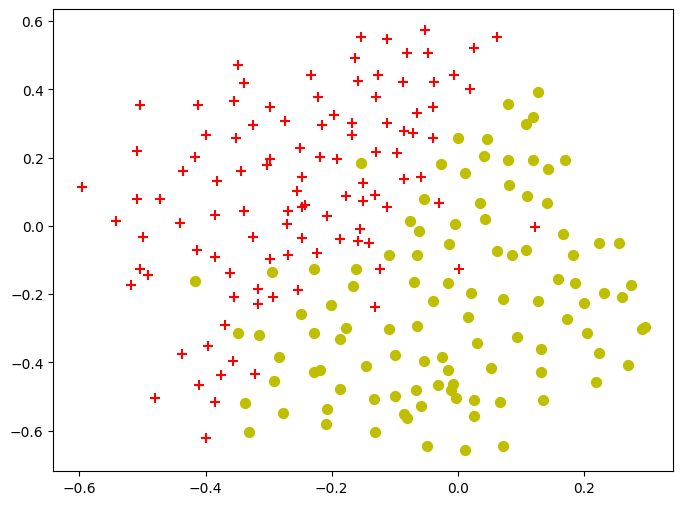

In [16]:
m3,n3 = X3.shape[0],X3.shape[1]
pos3,neg3= (y3==1).reshape(m3,1), (y3==0).reshape(m3,1)
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)

#### Question: What does the function in the following cell do? 

The function dataset3Params performs hyperparameter tuning for a Support Vector Machine (SVM) classifier using a grid search approach. Specifically, it aims to find the optimal values for the hyperparameters C (regularization parameter) and gamma (kernel coefficient) that maximize the classifier's accuracy on a validation set.

In [17]:
def dataset3Params(X, y, Xval, yval,vals):

    acc = 0
    best_c=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_c =C
                best_gamma=gamma
    return best_c, best_gamma

In [18]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataset3Params(X3, y3.ravel(), Xval, yval.ravel(),vals)


In [19]:
## Write your code here to classify X3 using the C and gamma you just obtained.
# 创建一个SVM分类器，使用找到的最佳参数C和gamma
classifier_optimal = SVC(C=C, gamma=gamma)

# 使用训练数据X3和y3训练分类器
classifier_optimal.fit(X3, y3.ravel())

# 对验证数据Xval进行预测
yval_pred = classifier_optimal.predict(Xval)

# 计算在验证数据上的准确率
accuracy = np.mean(yval_pred == yval.ravel())
print(f"验证集准确率: {accuracy:.4f}")


验证集准确率: 0.9650


### Plotting the decision boundary

(-0.7, 0.5)

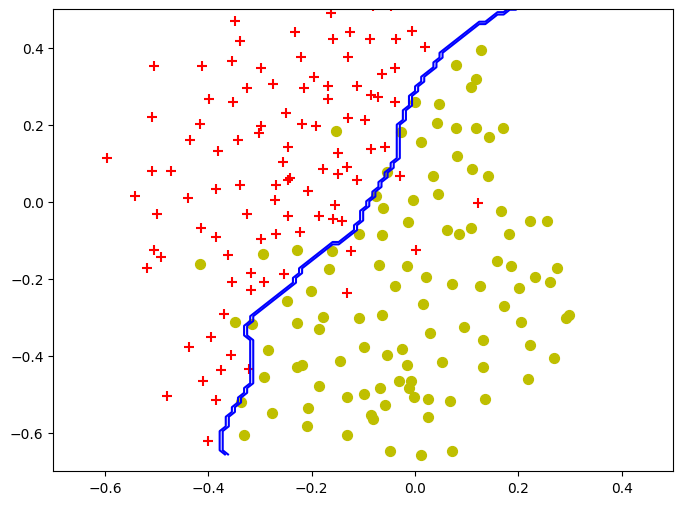

In [20]:
plt.figure(figsize=(8, 6))

# 绘制训练数据的散点图
pos3,neg3= (y3==1).reshape(m3,1), (y3==0).reshape(m3,1)
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)
# plotting the decision boundary
X_7,X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
plt.contour(X_7,X_8,classifier_optimal.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape),1,colors="b")
plt.xlim(-0.7, 0.5)
plt.ylim(-0.7, 0.5)

#### Question: The tuning procedure I just describe above is not the ideal approach. What potential issue may it cause? What is the right way to do it?

The potential issue with the current hyperparameter tuning approach is **overfitting to the validation set**. By directly using the validation set to iteratively select the best hyperparameters (C and γ), the model's performance on the validation set becomes overly optimistic and may not generalize well to unseen data. This happens because the validation set is used multiple times during the tuning process, effectively "training" the hyperparameters on the validation data.

### The Right Way to Tune Hyperparameters:
The correct approach is to use **cross-validation** (e.g., k-fold CV) on the training data to select hyperparameters. Here’s why:
1. **Avoid Validation Set Overfitting**: Cross-validation splits the training data into multiple folds, ensuring the model is validated on different subsets, reducing dependency on a single validation set.
2. **Robust Performance Estimate**: Averaging results across folds provides a more reliable estimate of generalization performance.
3. **Preserve Test/Validation Integrity**: After tuning via cross-validation, the final model should be evaluated on a **separate, held-out test set** (not used during training or validation) to ensure unbiased performance assessment.

### Implementation Steps:
1. **Split Data**: Divide data into training, validation, and test sets (if available).
2. **Cross-Validation**: Use k-fold cross-validation on the training set to evaluate hyperparameter combinations.
3. **Final Tuning**: Select the hyperparameters with the best cross-validation performance.
4. **Evaluation**: Test the final model on the untouched test set (or validation set, if no test set exists).

This method ensures hyperparameters are generalized and mitigates overfitting risks.

##  Part 2 (Optional): Let's get real: a spam classification

In [55]:
import re
from nltk.stem import PorterStemmer

file_contents = open("emailSample1.txt","r").read()
vocabList = open("vocab.txt","r").read()

In [56]:
vocabList=vocabList.split("\n")[:-1]

vocabList_d={}
for ea in vocabList:
    value,key = ea.split("\t")[:]
    vocabList_d[key] = value

### Preprocessing emails

In [57]:
def processEmail(email_contents,vocabList_d):
    """
    Preprocesses the body of an email and returns a list of indices of the words contained in the email. 
    """
    # Lower case
    email_contents = email_contents.lower()
    
    # Handle numbers
    email_contents = re.sub("[0-9]+","number",email_contents)
    
    # Handle URLS
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)
    
    # Handle $ sign
    email_contents = re.sub("[$]+","dollar",email_contents)
    
    # Strip all special characters
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")    
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    email_contents= " ".join(email_contents)
    
    # Process the email and return word_indices
    
    word_indices=[]
    
    for char in email_contents.split():
        if len(char) >1 and char in vocabList_d:
            word_indices.append(int(vocabList_d[char]))
    
    return word_indices

In [58]:
word_indices= processEmail(file_contents,vocabList_d)

### Extracting features from emails

In [59]:
def emailFeatures(word_indices, vocabList_d):
    """
    Takes in a word_indices vector and  produces a feature vector from the word indices. 
    """
    n = len(vocabList_d)
    
    features = np.zeros((n,1))
    
    for i in word_indices:
        features[i] =1
        
    return features

In [60]:
features = emailFeatures(word_indices,vocabList_d)
print("Length of feature vector: ",len(features))
print("Number of non-zero entries: ",np.sum(features))

Length of feature vector:  1899
Number of non-zero entries:  43.0


### Training SVM for spam classification

In order to predict the email loaded above as spam or ham, we needed to more data to train a SVM classifier. Now let's load some training and test data in the form of matrix. 

In [61]:
spam_mat = loadmat("spamTrain.mat")
X_train =spam_mat["X"]
y_train = spam_mat["y"]

In [62]:
C =0.1
## write your code here


spam_svc = SVC(C = 0.1, kernel='linear')
y_train_flat = y_train.ravel()


spam_svc.fit(X_train, y_train_flat)



## print accuracy
print("Training Accuracy:",(spam_svc.score(X_train,y_train.ravel()))*100,"%")

Training Accuracy: 99.825 %


**In the cells below, load the test data named spamTest.mat. Report the prediction accuracy.**

In [63]:
# 加载测试数据
spam_test = loadmat("spamTest.mat")
X_test = spam_test["Xtest"]
y_test = spam_test["ytest"]

# 使用训练好的模型进行预测
y_pred = spam_svc.predict(X_test)

In [64]:
# 计算测试准确率
test_accuracy = accuracy_score(y_test, y_pred) * 100

# 报告测试准确率
print("Test Accuracy:", test_accuracy, "%")

Test Accuracy: 98.9 %


### Top predictors for spam

In [74]:
weights = spam_svc.coef_[0]
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1),weights.reshape(1899,1)))
df = pd.DataFrame(weights_col)

df.sort_values(by=[1],ascending = False,inplace=True)

predictors = []
idx=[]
for i in df[0][:15]:
    for keys, values in vocabList_d.items():
        if str(int(i)) == values:
            predictors.append(keys)
            idx.append(int(values))

In [75]:
print("Top predictors of spam:")

for i in range(15):
    word = predictors[i]
    weight = df.iloc[i,1]
    print(f"{word}\t\t{weight:.6f}")

Top predictors of spam:
our		0.500614
click		0.465916
remov		0.422869
guarante		0.383622
visit		0.367710
basenumb		0.345064
dollar		0.323632
will		0.269724
price		0.267298
pleas		0.261169
most		0.257298
nbsp		0.253941
lo		0.253467
ga		0.248297
hour		0.246404


### Programming questions: 

**In the cells below, first load spamSample1 and convert it into feature vectors. Mix the vectors of spam with the email vector you obtain at the beginning of Part 2 to obtain a labeled test dataset (the spam vs ham). Write a program to use the model trained above to predict the emails.**

In [77]:
# 加载样本邮件
spam_sample1 = open("spamSample1.txt", "r").read()

# 预处理样本邮件
word_indices_spam = processEmail(spam_sample1, vocabList_d)

# 提取特征向量
features_spam = emailFeatures(word_indices_spam, vocabList_d)

# 确保特征向量的形状正确
features = features.reshape(-1)  # 将 features 转换为 (1899,) 形状
features_spam = features_spam.reshape(-1)  # 将 features_spam 转换为 (1899,) 形状

# 将样本邮件的特征向量与之前的特征向量结合
X_test_custom = np.vstack((features, features_spam))

# 创建标签向量（假设之前的邮件是ham，标签为0；样本邮件是spam，标签为1）
y_test_custom = np.array([0, 1])

# 使用训练好的模型进行预测
y_pred_custom = spam_svc.predict(X_test_custom)



In [78]:
print("Predictions:")
for i in range(len(y_pred_custom)):
    print(f"Email {i+1}: {'spam' if y_pred_custom[i] == 1 else 'ham'}")

Predictions:
Email 1: ham
Email 2: ham


**In the cells below. Write codes to load another email example that is emailSample2 and spamSample2 to create a second test set.Predict the spams on this new set.**

In [79]:
# 加载邮件样本
email_sample2 = open("emailSample2.txt", "r").read()
spam_sample2 = open("spamSample2.txt", "r").read()

# 预处理邮件样本
word_indices_email2 = processEmail(email_sample2, vocabList_d)
word_indices_spam2 = processEmail(spam_sample2, vocabList_d)

# 提取特征向量
features_email2 = emailFeatures(word_indices_email2, vocabList_d)
features_spam2 = emailFeatures(word_indices_spam2, vocabList_d)

# 确保特征向量的形状正确
features_email2 = features_email2.reshape(-1)
features_spam2 = features_spam2.reshape(-1)

# 将特征向量组合成一个新的测试集
X_test_new = np.vstack((features_email2, features_spam2))

# 创建标签向量（假设 emailSample2 是 ham，标签为 0；spamSample2 是 spam，标签为 1）
y_test_new = np.array([0, 1])

# 使用训练好的模型进行预测
y_pred_new = spam_svc.predict(X_test_new)


In [80]:

# 打印预测结果
print("Predictions for the new test set:")
for i in range(len(y_pred_new)):
    print(f"Email {i+1}: {'spam' if y_pred_new[i] == 1 else 'ham'}")

Predictions for the new test set:
Email 1: ham
Email 2: spam
